## Hammad Yasir

## Exploratory Data Analysis of IPL

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Load the datasets
matches = pd.read_csv("Indian Premier League/deliveries.csv")
deliveries = pd.read_csv('Indian Premier League/deliveries.csv')


In [7]:
matches.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Top 10 Batsmen by Total Runs

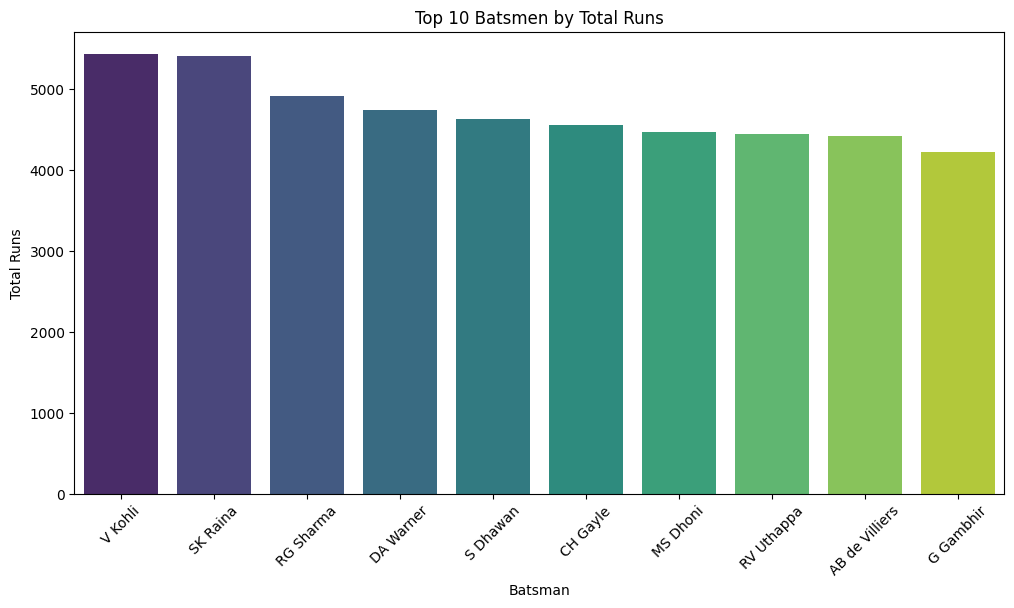

In [33]:
# 1. Top 10 Batsmen by Total Runs
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plotting the Top 10 Batsmen by Total Runs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette='viridis', hue=None, legend=False)
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

## Top 10 Bowlers by Total Wickets

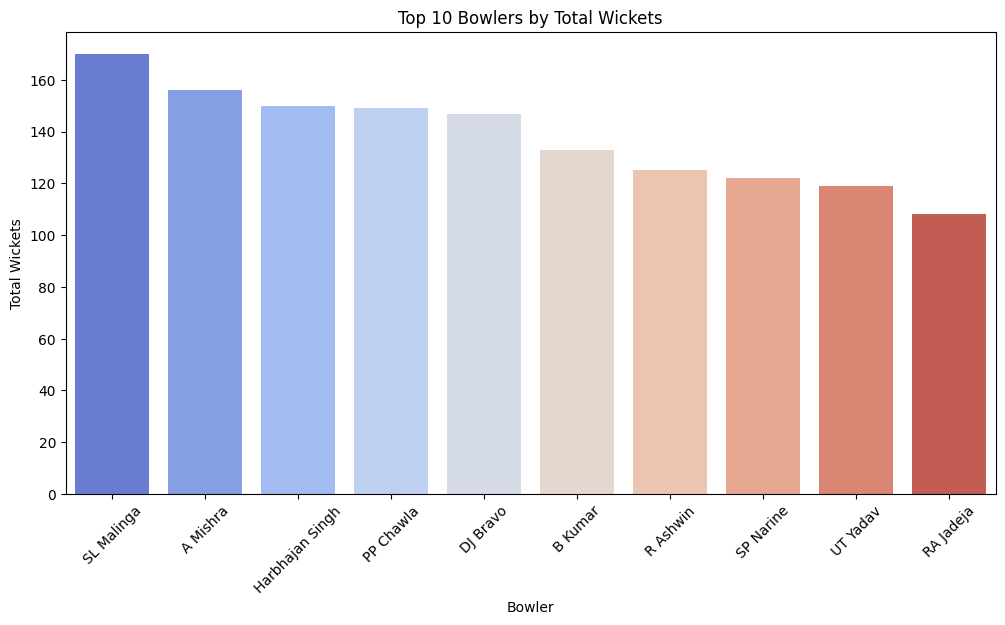

In [34]:
# 2. Top 10 Bowlers by Total Wickets
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]
top_bowlers = top_bowlers.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

# Plotting Top 10 Bowlers by Total Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette='coolwarm', hue=None, legend=False)
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

## Total Runs Scored per Over

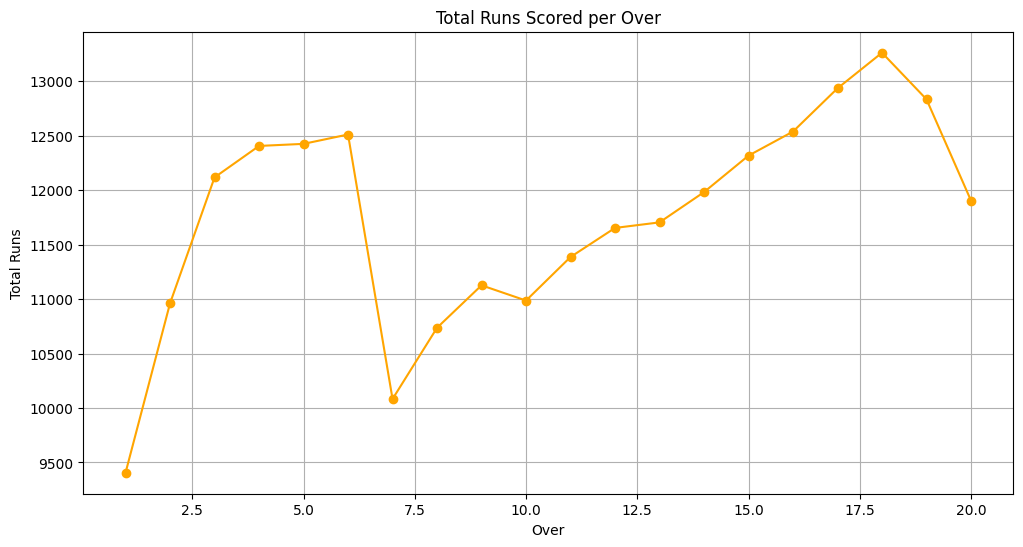

In [35]:
# 3. Total Runs Scored per Over
total_runs_per_over = deliveries.groupby('over')['total_runs'].sum()

# Plotting Total Runs Scored per Over
plt.figure(figsize=(12, 6))
plt.plot(total_runs_per_over.index, total_runs_per_over.values, marker='o', linestyle='-', color='orange')
plt.title('Total Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

## Win Percentage by Team

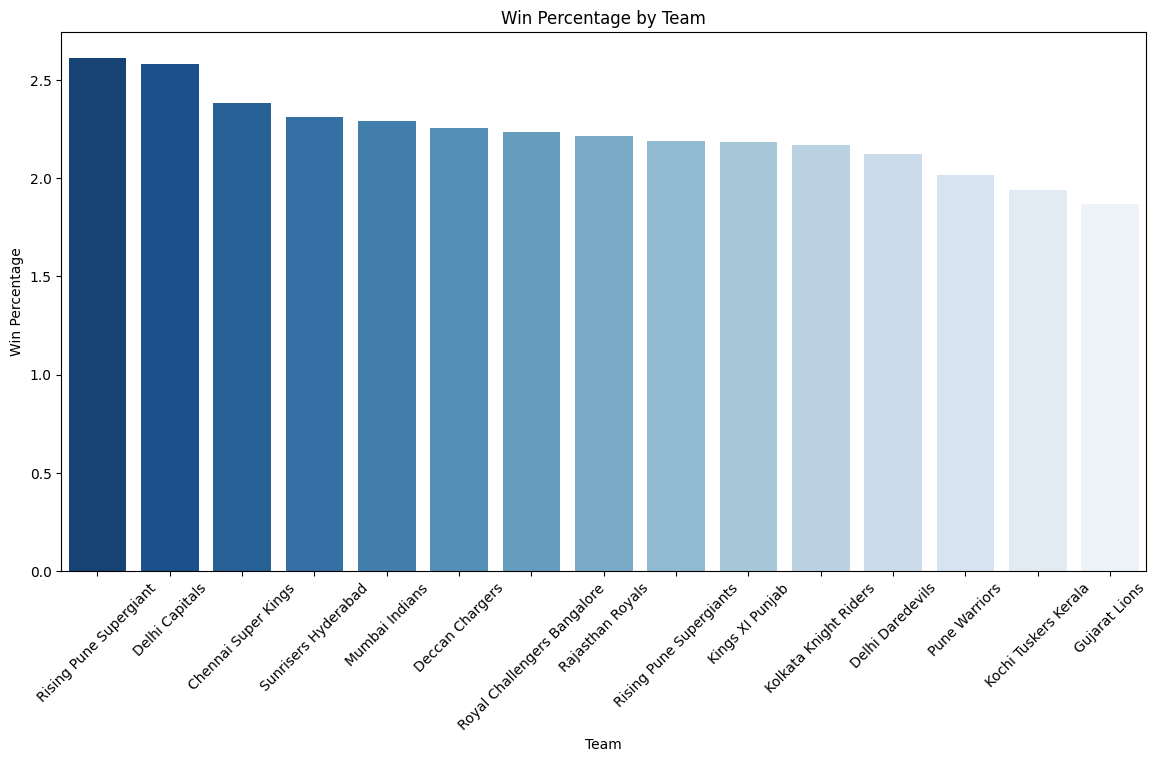

In [37]:
# 4. Win Percentage by Team
# Using 'batting_team' and 'bowling_team' columns to count total matches and wins
total_matches = deliveries['batting_team'].value_counts().add(deliveries['bowling_team'].value_counts(), fill_value=0)
team_wins = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')].groupby('bowling_team')['dismissal_kind'].count()
win_percentage = (team_wins / total_matches * 100).sort_values(ascending=False)
# Plotting Win Percentage by Team
plt.figure(figsize=(14, 7))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='Blues_r', hue=None, legend=False)
plt.title('Win Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()

## Total Wins by Team

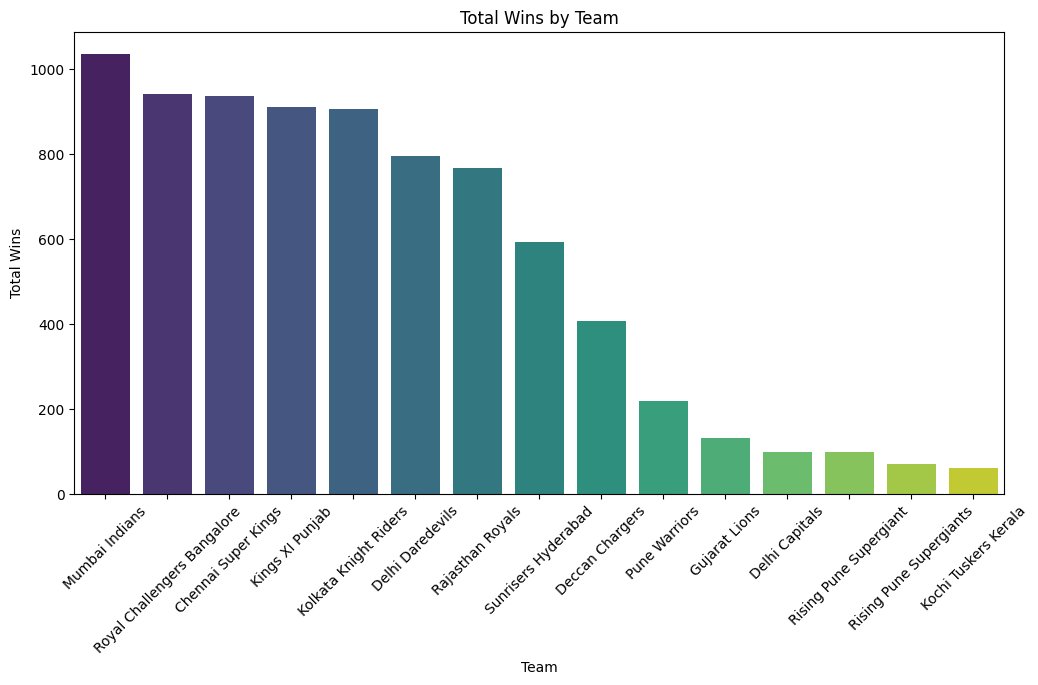

In [38]:
# 5. Total Wins by Team
total_wins = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')].groupby('bowling_team')['dismissal_kind'].count().sort_values(ascending=False)

# Plotting Total Wins by Team
plt.figure(figsize=(12, 6))
sns.barplot(x=total_wins.index, y=total_wins.values, palette='viridis', hue=None, legend=False)
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

## Correlation Heatmap for Deliveries Data

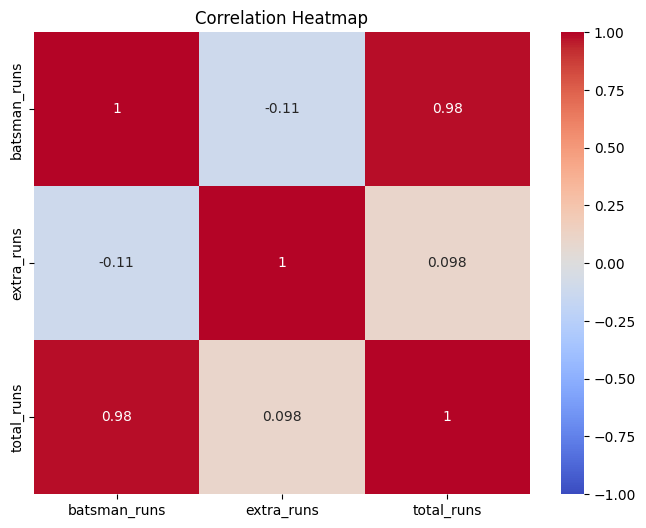

In [39]:
# 6. Correlation Heatmap for Deliveries Data
correlation_data = deliveries[['batsman_runs', 'extra_runs', 'total_runs']].corr()

# Plotting the Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Dismissals by Type

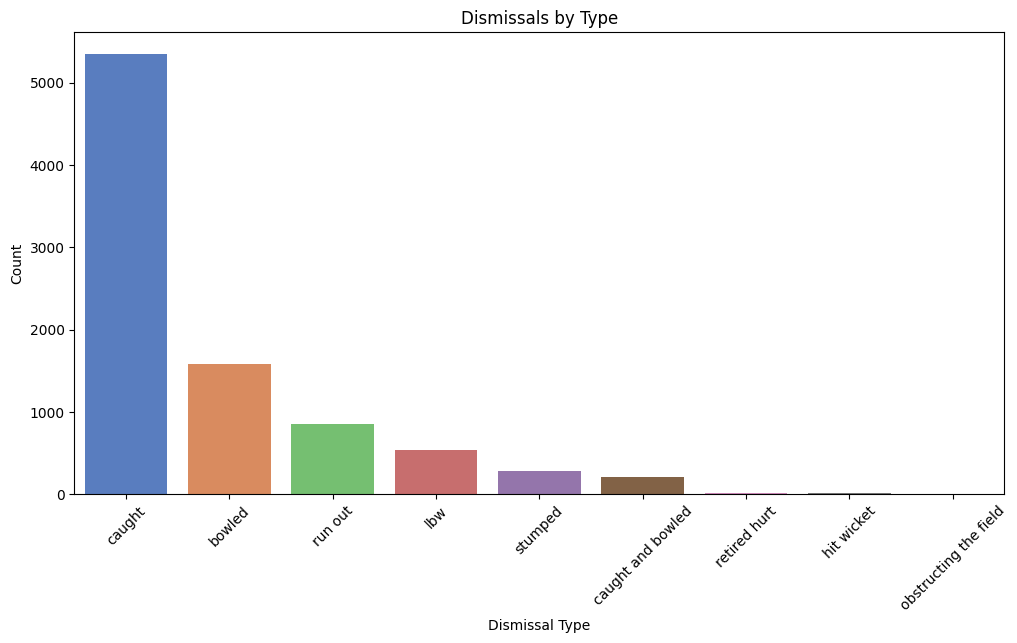

In [42]:
# 7. Dismissals by Type
dismissal_types = deliveries['dismissal_kind'].dropna().value_counts()

# Plotting Dismissals by Type
plt.figure(figsize=(12, 6))
sns.barplot(x=dismissal_types.index, y=dismissal_types.values, palette='muted', hue=None, legend=False)
plt.title('Dismissals by Type')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Top 10 Partnerships by Runs

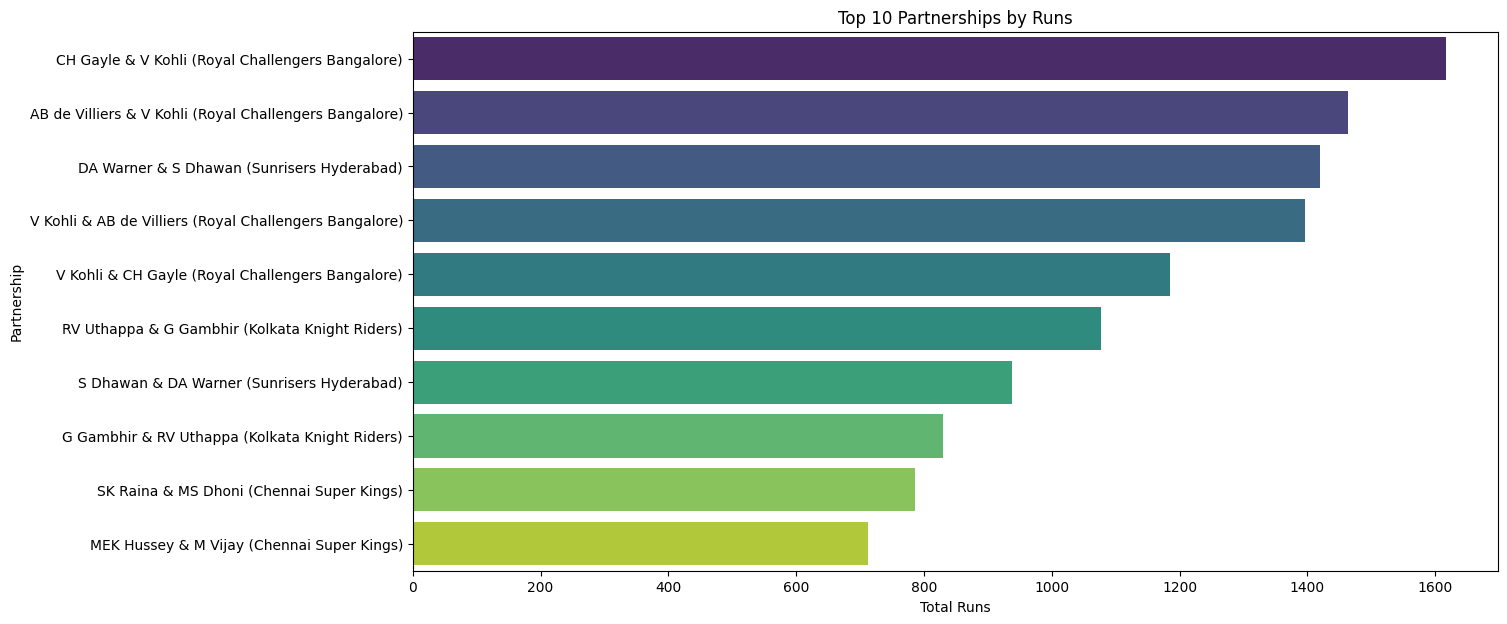

In [47]:
# 8. Top 10 Partnerships by Runs
partnerships = deliveries.groupby(['match_id', 'batting_team', 'batsman', 'non_striker'])['total_runs'].sum().reset_index()
top_partnerships = partnerships.groupby(['batting_team', 'batsman', 'non_striker'])['total_runs'].sum().sort_values(ascending=False).head(10).reset_index()

# Creating a single string representation of each partnership for plotting
top_partnerships['partnership'] = top_partnerships.apply(lambda row: f"{row['batsman']} & {row['non_striker']} ({row['batting_team']})", axis=1)

# Plotting Top 10 Partnerships by Runs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_partnerships['total_runs'], y=top_partnerships['partnership'], palette='viridis', hue=None, legend=False)
plt.title('Top 10 Partnerships by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Partnership')
plt.show()

## Most Economical Bowlers

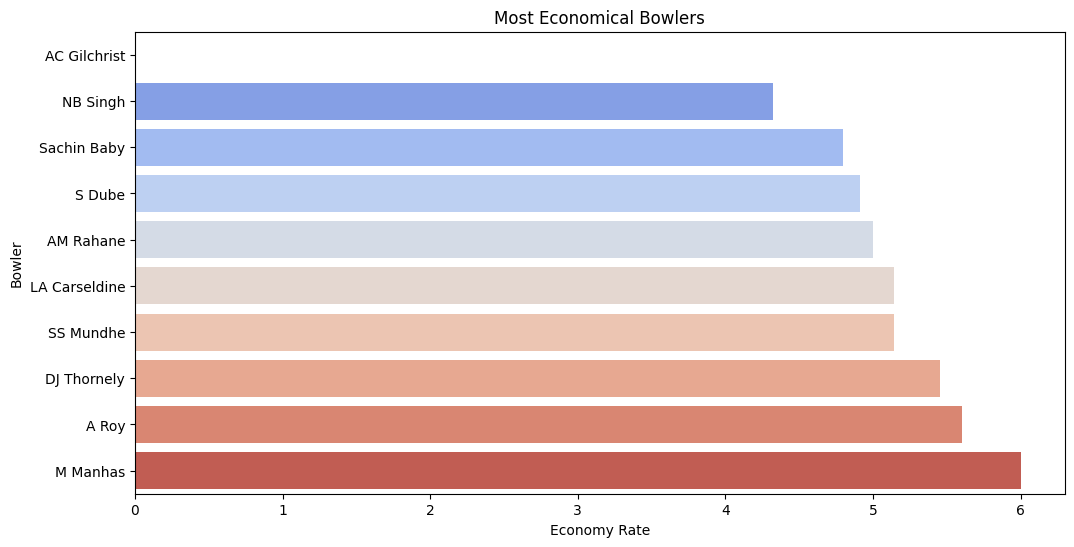

In [46]:
# 9. Most Economical Bowlers
# Calculating Economy Rate: (Total Runs Conceded / Total Overs Bowled)
bowlers = deliveries.groupby('bowler').agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
bowlers['overs'] = bowlers['ball'] // 6 + (bowlers['ball'] % 6) / 6
bowlers['economy_rate'] = bowlers['total_runs'] / bowlers['overs']
economical_bowlers = bowlers.sort_values('economy_rate').head(10)
# Plotting Most Economical Bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x=economical_bowlers['economy_rate'], y=economical_bowlers['bowler'], palette='coolwarm', hue=None, legend=False)
plt.title('Most Economical Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()